## TEAM MsC Course - NTUA
### Biostatistics & Machine Learning
###1st student assignement
##### Academic Year 2024-25



Student Name: Nikolaos-Andreas Tzovaras

ID: 03500077

### 1. Dataset import

We will be using the [Diabetes Healthcare: Comprehensive Dataset-AI](https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset). You may load it directly into a pandas DataFrame from this link: https://team-biostats-and-ml.tiiny.site/health-care-diabetes.csv

Then split it on a training and a test set using the *train_test_split()* method from the submodule model_selection of sci-kit learn, after you perform the Exploratory Data Analysis Steps of Section 2. Use the last three digits of your student ID number as the `random_state` parameter to *train_test_split()* (or the four digits of the age you were born, if you do not have a student ID number assigned yet).




In [ ]:
import pandas as pd
url = "https://team-biostats-and-ml.tiiny.site/health-care-diabetes.csv"
data = pd.read_csv(url)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

### 2. Exploratory Data Analysis (EDA)

Use code cells with the appropriate EDA techniques to inspect the data set and text cells to explain the results. You may use more code and text ce

Using the appropriate methods, write the relevant code to answer the following questions:

2a. the number of samples and features of the data set


In [ ]:
y=data['Outcome']
X=data.drop('Outcome', axis=1)
X.info()
print(data.shape)
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
(768, 9)
(768, 8)


The number of the data is 768 and the number of the features is 8.


2b. the type of the features of the data set,

In [ ]:
print(X.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


2c. the attribute labels,

In [ ]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


2d. the number of categories,

In [ ]:
print(data['Outcome'].nunique())

2


2e. how many samples belong to each category,

In [ ]:
print(data["Outcome"].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


2f. the correlation between the data,

In [ ]:
corr=data.corr(numeric_only=True)
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

2g. any other analysis you find useful for understanding the data set.

<Axes: >

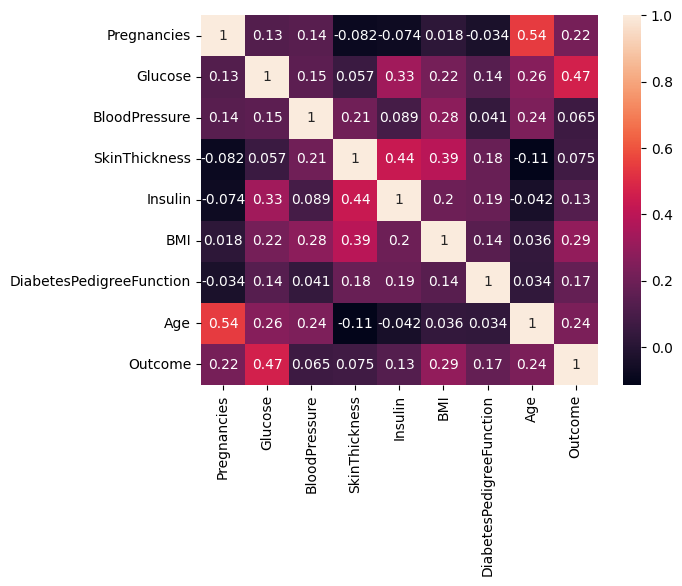

In [ ]:
import seaborn as sns
sns.heatmap(corr, annot = True)

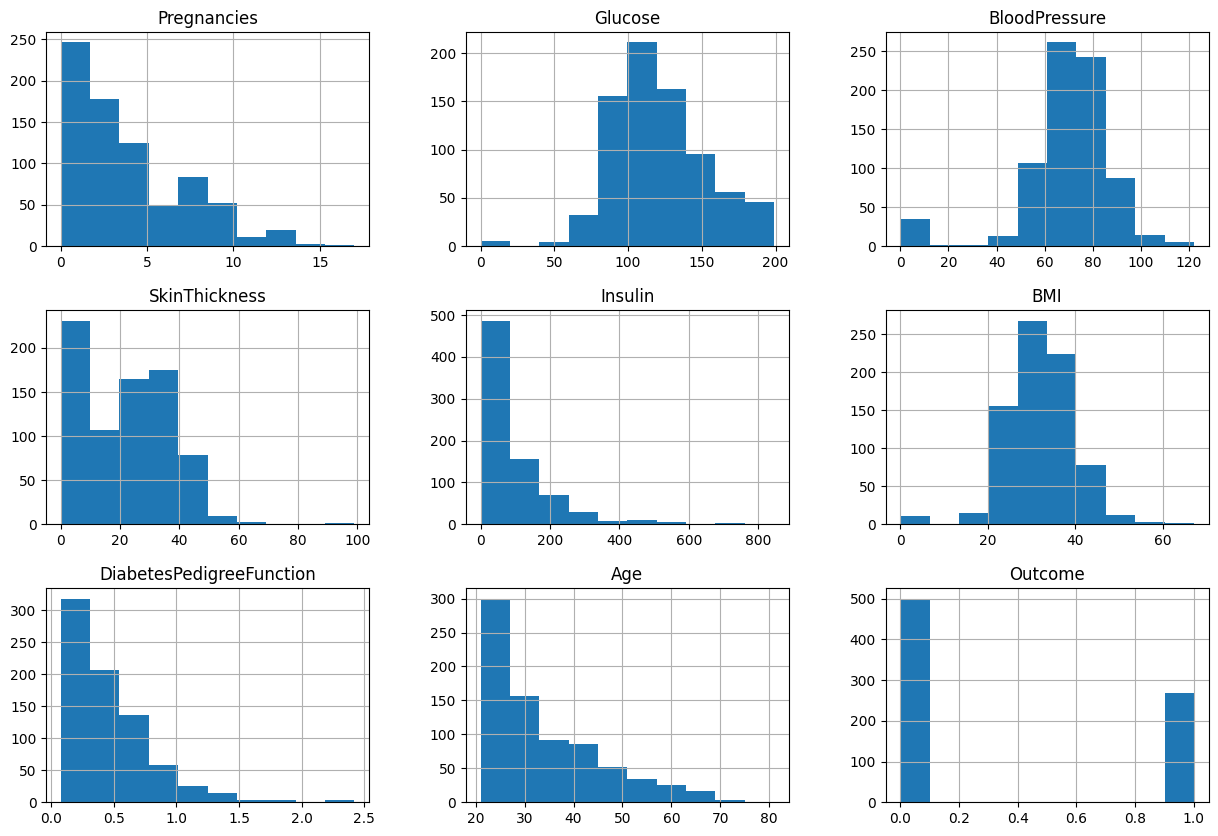

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(15, 10))
plt.show()

### 3. Data Preprocessing
💡`Use the Column Transformer in order to create and apply different transformations for the numerical and categorical data.`




3.a. Will you use all the features of the dataset to train the classifiers, or will you select some of them? Will you be combining some features to create new features for your model?

Before any preprocessing step we split the data into train and test subsets to avoid data leakage.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
RAND_STATE=77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RAND_STATE)
X_train.shape, X_test.shape

((537, 8), (231, 8))

As we can see from the correlation matrix above, Blood Pressure has very low correlation with the Outcome, but i choose to not drop this feature. So, i choose to use all the features of the dataset to train the classifiers.

3.b. Are there any missing values? Write the appropriate code to handle these values.

As per the Problem, it is given that - "On the columns below, a value of zero does not make sense and thus indicates missing value".

Now let us change the "0" value to Nan, so that the pandas function can understand it as Null. From all the features, we will consider input features under this and also from all the input features only Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI. Out of this, pregnancy is genuine case to have "0" value, so we will apply this to rest of the features.

In [ ]:
X[["Glucose","SkinThickness","Insulin","BMI"]] = X[["Glucose","SkinThickness","Insulin","BMI"]].replace(0,np.NAN)
X.isnull().mean()*100

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,0.000000
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
missing_values_features = ['Glucose', 'SkinThickness', 'Insulin', 'BMI']
missing_values_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', MinMaxScaler())])

3.c. Write the appropriate code to convert the categorical variables (if any) so that the classifiers you use can handle them.

In [ ]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


I don't have categorical variables.

3.d. Write code for feature scaling if you find it necessary

In [ ]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

As we can see the data consists of features with different scales, so we choose to scale via MinMaxScaler(We already did that in the features with the missing values).

In [ ]:
min_max_scale_features = ['Pregnancies','BloodPressure', 'DiabetesPedigreeFunction', 'Age']
min_max_scale_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

3.e. Perform all the previous pretraining steps (using transformations) so that the initial set is "clean" to be used for training the classifiers.

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('sim_imp', missing_values_transformer, missing_values_features),
        ('scale', min_max_scale_transformer, min_max_scale_features),])
pipeline = Pipeline(steps=[('prepocessor',preprocessor)])

3.f. After "cleaning" the initial training set, write the appropriate code to generate the $X$ and $y$ sets from the initial training set.

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('sim_imp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Glucose', 'SkinThickness',
                                                   'Insulin', 'BMI']),
                                                 ('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies',
                                                   'BloodPressure',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])]))])

3.g. Furtrher Divide the training set into a training set and a validation set (the split should be 70% train set and 30% validation set). Again, pass to the `random_state` parameter of the *train_test_split()* method the last three digits of your student ID number.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=RAND_STATE)

X_train.shape, X_val.shape

((375, 8), (162, 8))

### 4. Train models with default hyper-parameters

We will train the following classifiers with our training data set:
1. Naive Bayes
2. KNeighborsClassifier
3. MLP with only **one** hidden layer
4. Decision Tree
5. Random Forest


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
gnb = GaussianNB()
knn = KNeighborsClassifier()
mlp = MLPClassifier(solver='lbfgs', max_iter=500, hidden_layer_sizes=(6,), random_state=RAND_STATE)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

For the MLP Classifiers i chose 6 neurons based on the Rule of Thumb.

 4.a. Train (fit) all the 5 classifiers mentioned above on the training set, using the default values for all their hyper-parameters.

In [ ]:
model_gnb= Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', gnb)])
model_gnb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sim_imp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Glucose', 'SkinThickness',
                                                   'Insulin', 'BMI']),
                                                 ('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies',
                                                   'BloodPressure',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifier', GaussianNB())])

In [ ]:
model_knn= Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', knn)])
model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sim_imp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Glucose', 'SkinThickness',
                                                   'Insulin', 'BMI']),
                                                 ('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies',
                                                   'BloodPressure',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
model_mlp= Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', mlp)])
model_mlp.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sim_imp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Glucose', 'SkinThickness',
                                                   'Insulin', 'BMI']),
                                                 ('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies',
                                                   'BloodPressure',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(6,), max_iter=500,
                               random_state=77, solver='lbfgs'))])

In [ ]:
model_dt= Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', dt)])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sim_imp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Glucose', 'SkinThickness',
                                                   'Insulin', 'BMI']),
                                                 ('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies',
                                                   'BloodPressure',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
model_rf= Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf)])
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sim_imp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Glucose', 'SkinThickness',
                                                   'Insulin', 'BMI']),
                                                 ('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pregnancies',
                                                   'BloodPressure',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifier', RandomForestClassifier())])

4.b. Predict the label of the samples of the test set on all trained models.

In [ ]:
y_pred_gnb = model_gnb.predict(X_test)
print(y_pred_gnb)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0]


In [ ]:
y_pred_knn = model_knn.predict(X_test)
print(y_pred_knn)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1
 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 0 0 0 0]


In [ ]:
y_pred_mlp = model_mlp.predict(X_test)
print(y_pred_mlp)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 0]


In [ ]:
y_pred_dt = model_dt.predict(X_test)
print(y_pred_dt)

[0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0]


In [ ]:
y_pred_rf = model_rf.predict(X_test)
print(y_pred_rf)

[0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 0 0 0]



4.c. Compare the output of each model against the corresponding test set labels and evaluate their performance using the F1 score.

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_gnb))
print(f1_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_mlp))
print(f1_score(y_test, y_pred_dt))
print(f1_score(y_test, y_pred_rf))

0.6233766233766234
0.6329113924050633
0.5882352941176471
0.4666666666666667
0.589041095890411


4.d. Evaluate the overall performance of the models using a graph (eg histogram, bar plot) and comment on which model performed best.

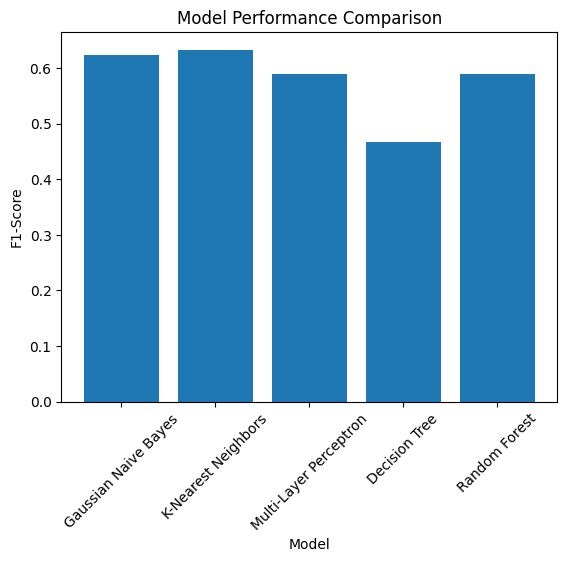

In [ ]:
# Model names
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Multi-Layer Perceptron', 'Decision Tree', 'Random Forest']

# F1-scores
f1_scores = [0.6233766233766234, 0.6329113924050633, 0.5882352941176471, 0.4666666666666667, 0.589041095890411]

# Create a bar plot
plt.bar(model_names, f1_scores)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model Performance Comparison')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

As we can see from the histogram, the model that performed best is the K-Nearest Neighbors.

### 5. Model optimization through hyper-parameter tuning

5.a. For the 7 classifiers optimize their performance using grid search with cross-validation (k-fold 5) to find their  optimal hyper-parameter values.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameter search spaces for each model
search_space_gnb = {'classifier__var_smoothing': np.logspace(0, -9, num=100)}
search_space_knn = {'classifier__n_neighbors': [1, 3, 5],
                'classifier__metric': ['euclidean', 'manhattan']
                 }
search_space_mlp = {'classifier': [MLPClassifier()],
                'classifier__hidden_layer_sizes': [(10,), (50,), (100,)],
                'classifier__activation': ['relu', 'tanh'],
                'classifier__solver': ['adam', 'lbfgs'],
                'classifier__alpha': [0.0001, 0.05],
                'classifier__learning_rate': ['constant', 'adaptive']
                }
search_space_dt = {'classifier': [DecisionTreeClassifier()],
                'classifier__criterion': ['gini', 'entropy'],
                'classifier__splitter': ['best', 'random'],
                'classifier__max_depth': [None, 5, 10, 15],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__min_samples_leaf': [1, 2, 4]
                }
search_space_rf = {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': range(10, 1000, 50),
                 'classifier__max_depth': range(1,10,1),
                }

In [ ]:
# Create GridSearchCV objects
grid_search_gnb = GridSearchCV(model_gnb, search_space_gnb, cv=5)
grid_search_knn = GridSearchCV(model_knn, search_space_knn, cv=5)
grid_search_mlp = GridSearchCV(model_mlp, search_space_mlp, cv=5)
grid_search_dt = GridSearchCV(model_dt, search_space_dt, cv=5)
grid_search_rf = GridSearchCV(model_rf, search_space_rf, cv=5)

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning

# Fit the GridSearchCV objects to the training data
grid_search_gnb.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_mlp.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and scores for each model
print("Best parameters for GaussianNB:", grid_search_gnb.best_params_)
print("Best score for GaussianNB:", grid_search_gnb.best_score_)
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)
print("Best parameters for MLP:", grid_search_mlp.best_params_)
print("Best score for MLP:", grid_search_mlp.best_score_)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

# Access the best models
best_model_gnb = grid_search_gnb.best_estimator_
best_model_knn = grid_search_knn.best_estimator_
best_model_mlp = grid_search_mlp.best_estimator_
best_model_dt = grid_search_dt.best_estimator_
best_model_rf = grid_search_rf.best_estimator_


Best parameters for GaussianNB: {'classifier__var_smoothing': 0.15199110829529336}
Best score for GaussianNB: 0.7386666666666668
Best parameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5}
Best score for KNN: 0.736
Best parameters for MLP: {'classifier': MLPClassifier(), 'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (10,), 'classifier__learning_rate': 'constant', 'classifier__solver': 'lbfgs'}
Best score for MLP: 0.7466666666666667
Best parameters for Decision Tree: {'classifier': DecisionTreeClassifier(), 'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Best score for Decision Tree: 0.736
Best parameters for Random Forest: {'classifier': RandomForestClassifier(), 'classifier__max_depth': 4, 'classifier__n_estimators': 60}
Best score for Random Forest: 0.76


5.b. Feed the trained models with samples from the test set (predict)

In [ ]:
y_pred_gnb = best_model_gnb.predict(X_test)
y_pred_knn = best_model_knn.predict(X_test)
y_pred_mlp = best_model_mlp.predict(X_test)
y_pred_dt = best_model_dt.predict(X_test)
y_pred_rf = best_model_rf.predict(X_test)


5.c. Compare the output of each model against the corresponding test set labels and evaluate their performance using the F1 score.

In [ ]:
print("F1 score for GaussianNB:")
print(f1_score(y_test, y_pred_gnb))
print("F1 score for KNN:")
print(f1_score(y_test, y_pred_knn))
print("F1 score for MLP:")
print(f1_score(y_test, y_pred_mlp))
print("F1 score for Decision Tree:")
print(f1_score(y_test, y_pred_dt))
print("F1 score for Random Forest:")
print(f1_score(y_test, y_pred_rf))

F1 score for GaussianNB:
0.5985401459854015
F1 score for KNN:
0.6329113924050633
F1 score for MLP:
0.583941605839416
F1 score for Decision Tree:
0.5698324022346368
F1 score for Random Forest:
0.5555555555555556


5.d. Evaluate the overall performance of the models using a graph (eg histogram, bar plot) and comment on which model performed best.

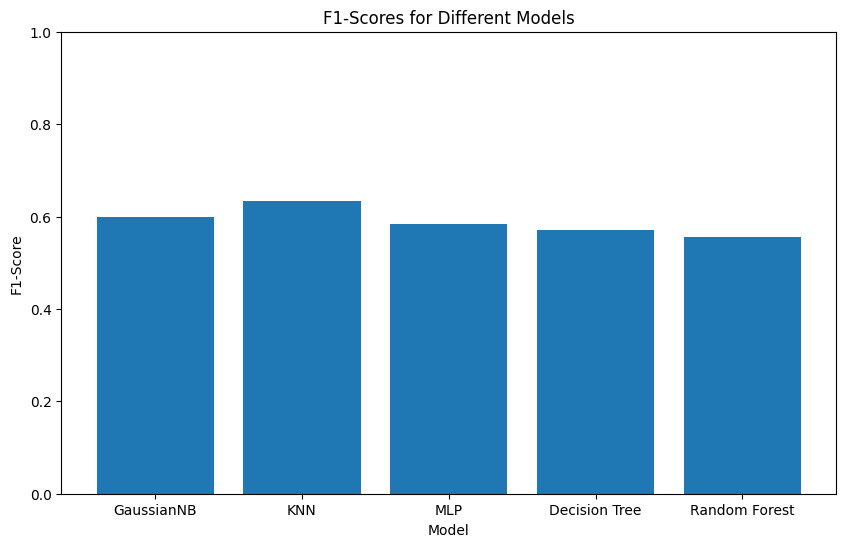

In [ ]:
f1_gnb = f1_score(y_test, y_pred_gnb)
f1_knn = f1_score(y_test, y_pred_knn)
f1_mlp = f1_score(y_test, y_pred_mlp)
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)

# Prepare data for plotting
model_names = ['GaussianNB', 'KNN', 'MLP', 'Decision Tree', 'Random Forest']
f1_scores = [f1_gnb, f1_knn, f1_mlp, f1_dt, f1_rf]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Different Models')
plt.ylim(0, 1)
plt.show()

Again, KNN is the model that performed best using Grid Search to find the optimal hyper-parameters values.